# KS检验

KS检验，也称为Kolmogorov-Smirnov检验，是一种用于检查一个样本是否符合特定分布的非参数统计检验方法。它比较了样本累积分布函数（ECDF）与理论累积分布函数（CDF）之间的差异。

KS检验可以用于比较两个样本是否来自相同的分布。这是通过比较两个样本的累积分布函数（ECDF）来完成的。下面是进行KS检验的基本步骤：

- 收集两个样本： 假设你有两个样本，分别是样本A和样本B。

- 计算两个样本的ECDF： 对于每个样本，计算并绘制累积分布函数。

- 比较两个样本的ECDF： 将样本A的ECDF与样本B的ECDF进行比较，找出它们之间的最大垂直差异。

- 计算KS统计量： 将最大垂直差异作为KS统计量。

- 进行假设检验： 将KS统计量与临界值进行比较，以确定是否有足够的证据拒绝原假设（即两个样本来自相同的分布）。

如果KS统计量小于临界值，你可能会得出两个样本来自相同分布的结论。反之，如果KS统计量较大，你可能会拒绝原假设，表示两个样本来自不同的分布。

![hellworld](../images/ks.jpeg)

**KS检验对样本量较大时更敏感，而对样本量较小时可能不够精确。**

In [1]:
from scipy.stats import ks_2samp
import numpy as np

# 生成两个样本数据
sample_a = np.random.normal(0, 1, 100)
sample_b = np.random.normal(0, 1.5, 120)

# 进行KS检验
statistic, p_value = ks_2samp(sample_a, sample_b)

# 打印结果
print("KS统计量:", statistic)
print("P值:", p_value)

# 判断是否拒绝原假设
alpha = 0.05
if p_value < alpha:
    print("拒绝原假设，两个样本来自不同分布")
else:
    print("无法拒绝原假设，两个样本可能来自相同分布")


KS统计量: 0.145
P值: 0.18249077974284608
无法拒绝原假设，两个样本可能来自相同分布


# AD检验

In [2]:
from scipy.stats import anderson
import numpy as np

# 生成两个样本数据
sample_a = np.random.normal(0, 1, 100)
sample_b = np.random.normal(0, 1.5, 120)

# 合并两个样本
combined_sample = np.concatenate([sample_a, sample_b])

# 进行AD检验
result = anderson(combined_sample)

# 打印结果
print("AD统计量:", result.statistic)
print("临界值:", result.critical_values)
print("显著性水平:", result.significance_level)

# 判断是否拒绝原假设
alpha = 0.05
if result.statistic > result.critical_values[2]:
    print("拒绝原假设，两个样本不来自相同分布")
else:
    print("无法拒绝原假设，两个样本可能来自相同分布")


AD统计量: 0.37882315493396845
临界值: [0.566 0.645 0.773 0.902 1.073]
显著性水平: [15.  10.   5.   2.5  1. ]
无法拒绝原假设，两个样本可能来自相同分布


# KL散度

In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
pd.set_option('display.float_format',  '{:,.2f}'.format)
pd.set_option( 'display.precision',2)
%matplotlib inline

KL散度: inf


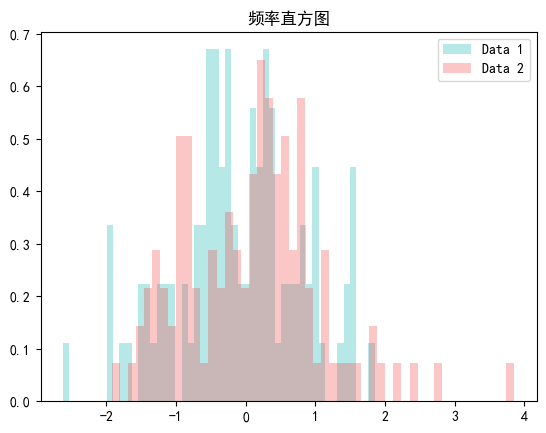

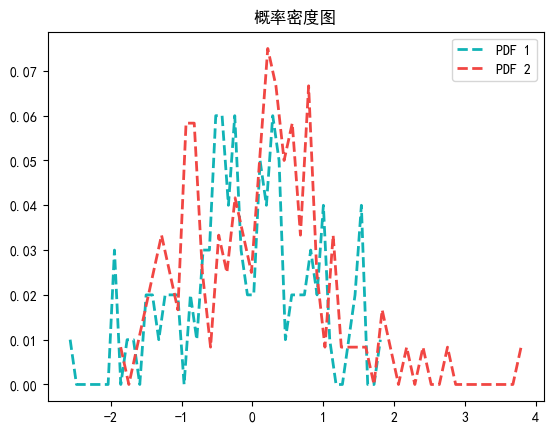

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

np.random.seed(42)
data1 = np.random.normal(0, 1, 100) # 数据一
data2 = np.random.normal(0, 1, 120) # 数据二

# 生成两个直方图
hist1, bins1 = np.histogram(data1, bins=50, density=True) # hist等于频率/组距
hist2, bins2 = np.histogram(data2, bins=50, density=True)

# 计算每个区间的概率密度
pdf1 = hist1 / np.sum(hist1)
pdf2 = hist2 / np.sum(hist2)

# 计算KL散度
kl_divergence = entropy(pdf1, pdf2)

# 打印结果
print("KL散度:", kl_divergence)

# 绘制直方图和概率密度函数
plt.figure()
plt.hist(data1, bins=bins1, density=True, alpha=0.3, color='#11b3b6', label='Data 1', histtype='stepfilled' )
plt.hist(data2, bins=bins2, density=True, alpha=0.3, color='#f14643', label='Data 2', histtype='stepfilled')
plt.legend() 
plt.title('频率直方图')

plt.figure()
plt.plot((bins1[:-1] + bins1[1:]) / 2, pdf1, color='#11b3b6', linestyle='dashed', linewidth=2, label='PDF 1')
plt.plot((bins2[:-1] + bins2[1:]) / 2, pdf2, color='#f14643', linestyle='dashed', linewidth=2, label='PDF 2')
# 显示图例和标题
plt.legend()
plt.title('概率密度图')

plt.show()

# KDE核密度估计

核密度估计（Kernel Density Estimation，KDE）是一种非参数统计方法，用于估计概率密度函数（PDF）的一种平滑版本。KDE通过在每个数据点周围放置核（通常是一个标准正态分布的函数），然后将这些核函数叠加在一起，形成整体的概率密度估计。

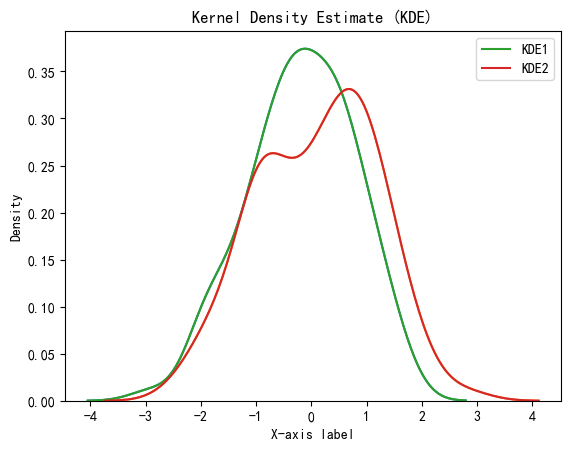

In [22]:
data1 = np.random.normal(0, 1, 100) # 数据一
data2 = np.random.normal(0, 1, 120) # 数据二

sns.kdeplot(data1)
sns.kdeplot(data2)
# 使用 Seaborn 绘制 KDE 曲线
sns.kdeplot(data1, label='KDE1')
sns.kdeplot(data2, label='KDE2')

# 添加标签和标题
plt.xlabel('X-axis label')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE)')

# 显示图例
plt.legend()

# 显示图形
plt.show()

# 累积分布函数

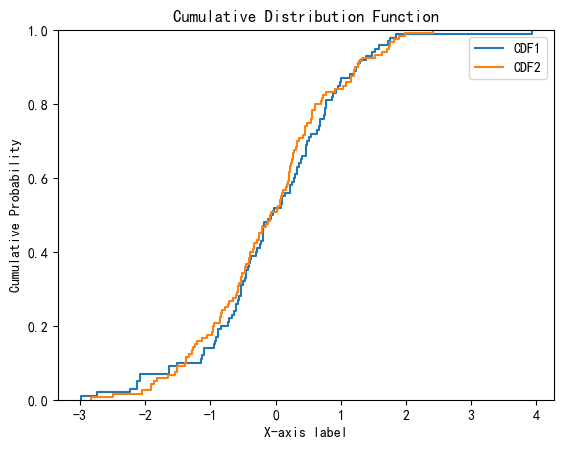

In [21]:
data1 = np.random.normal(0, 1, 100) # 数据一
data2 = np.random.normal(0, 1, 120) # 数据二

# 使用 Seaborn 绘制累积分布函数曲线
sns.ecdfplot(data=data1, label='CDF1')
sns.ecdfplot(data=data2, label='CDF2')

# 添加标签和标题
plt.xlabel('X-axis label')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function')

# 显示图例
plt.legend()

# 显示图形
plt.show()